In [54]:
import numpy as np
import pandas as pd
#绘图
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#各种模型、数据处理方法
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from sklearn.metrics import precision_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
import warnings
warnings.filterwarnings('ignore')

from scipy import stats
from scipy.stats import norm, skew #for some statistics
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei'] # 指定默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号'-'显示为方块的问题

In [55]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [56]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
5,1466,60,RL,75.0,10000,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal
6,1467,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,Normal
7,1468,60,RL,63.0,8402,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
8,1469,20,RL,85.0,10176,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2010,WD,Normal
9,1470,20,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,4,2010,WD,Normal


In [57]:
train_df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

变量说明：

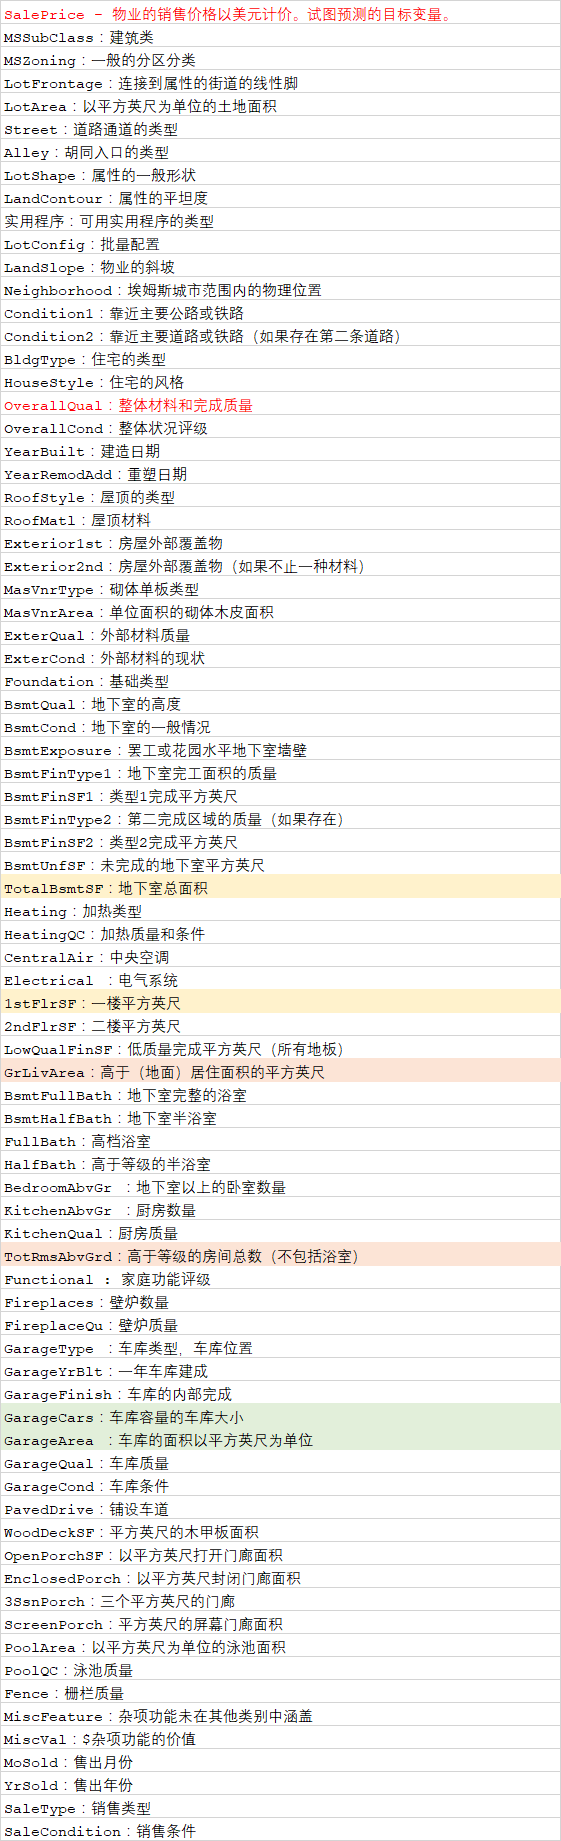

In [58]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [59]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

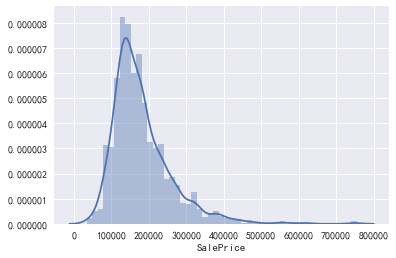

In [60]:
#histogram
sns.distplot(train_df['SalePrice']);

In [61]:
#skewness and kurtosis
print("Skewness: %f" % train_df['SalePrice'].skew())
print("Kurtosis: %f" % train_df['SalePrice'].kurt())

Skewness: 1.882876
Kurtosis: 6.536282


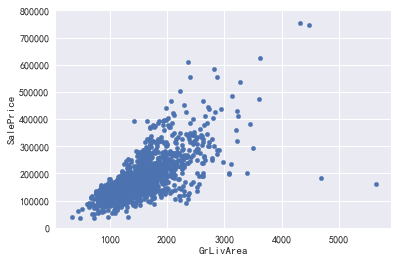

In [62]:
#scatter plot grlivarea/saleprice 高于（地面）居住面积的平方英尺与销售价格
var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

可以在右下角看到两个价格很低的极大GrLivArea。

这两点并不代表典型案例。 因此，我们将它们定义为异常值并删除它们。


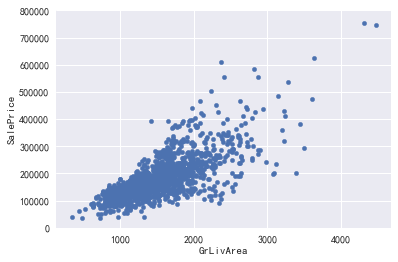

In [64]:
#Deleting outliers
train_df = train_df.drop(train_df[(train_df['GrLivArea']>4000) & (train_df['SalePrice']<300000)].index)

var = 'GrLivArea'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

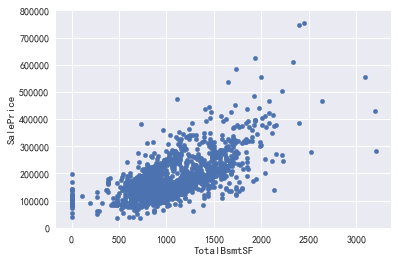

In [65]:
#scatter plot totalbsmtsf/saleprice 地下室总面积与销售价格
var = 'TotalBsmtSF'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

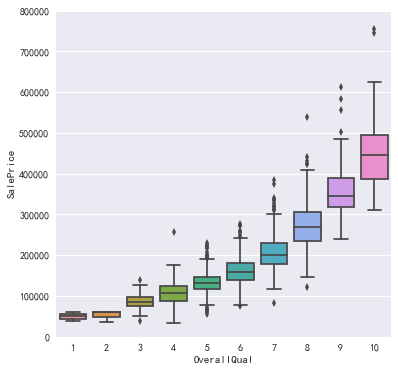

In [66]:
#box plot overallqual/saleprice 总体质量
var = 'OverallQual'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(6, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

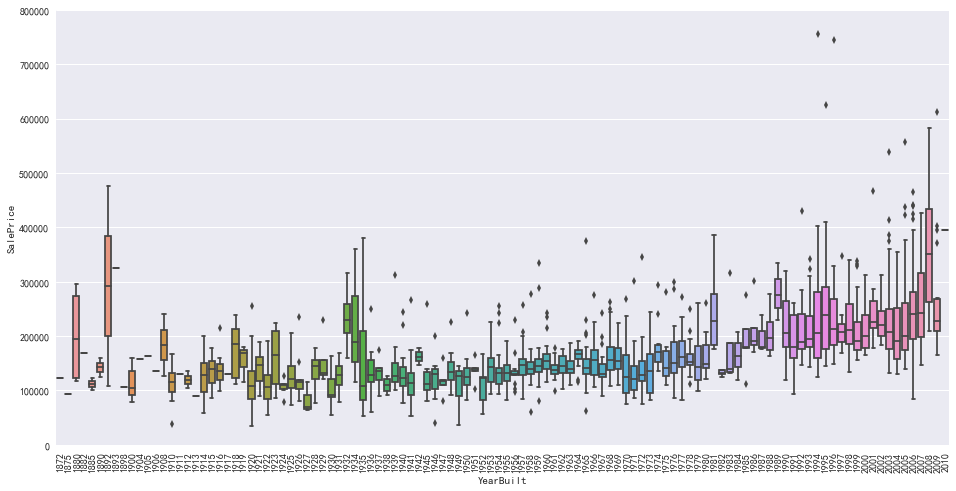

In [67]:
var = 'YearBuilt'
data = pd.concat([train_df['SalePrice'], train_df[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90); #x轴标签 旋转角度（90）

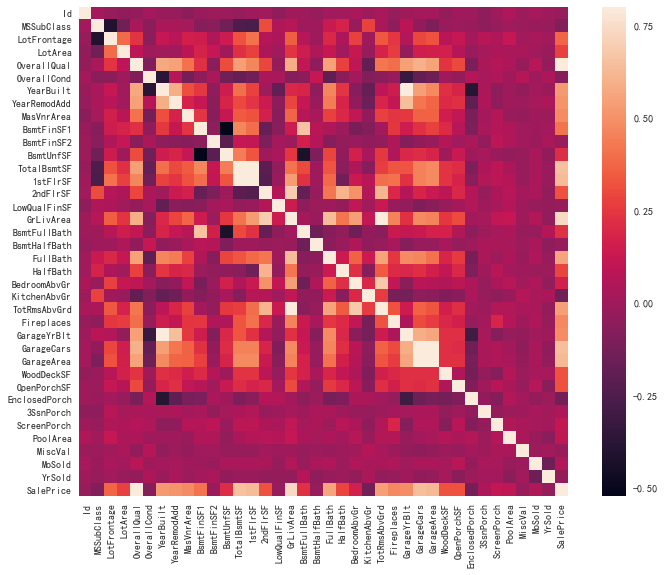

In [68]:
#correlation matrix
corrmat = train_df.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

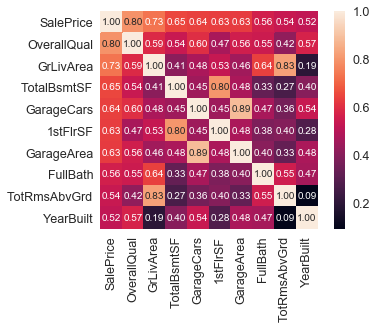

In [69]:
#saleprice correlation matrix
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

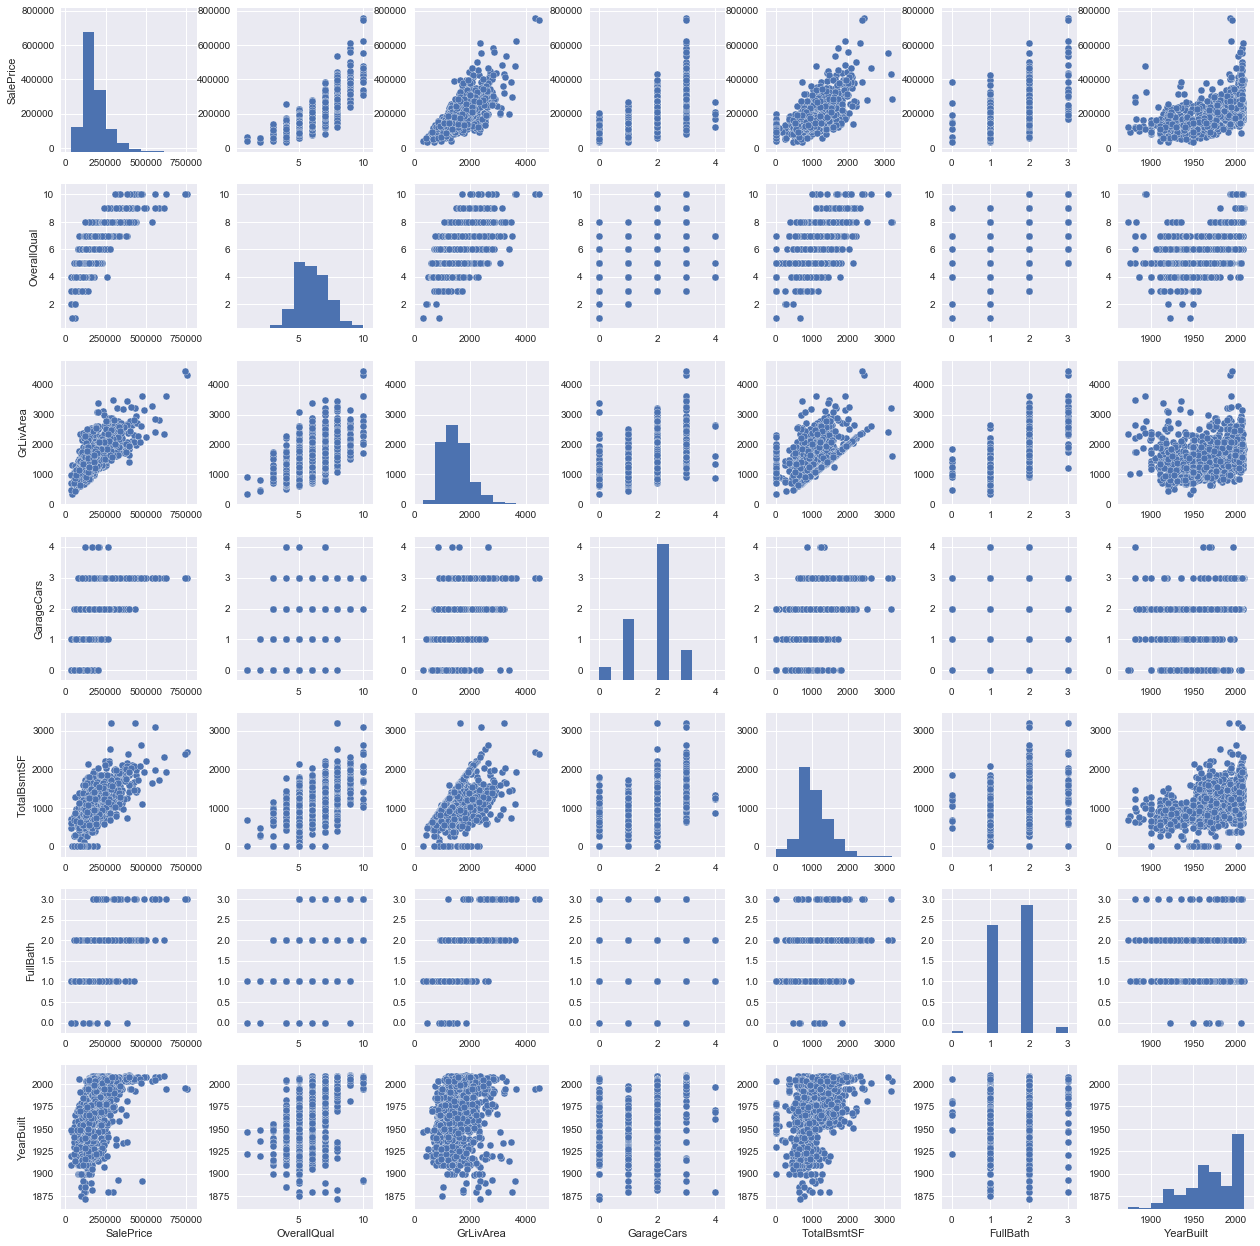

In [70]:
#scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train_df[cols], size = 2.5)
plt.show();


 mu = 180932.92 and sigma = 79467.79



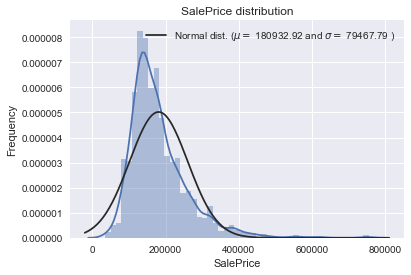

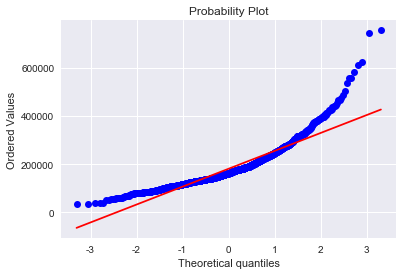

In [71]:
sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



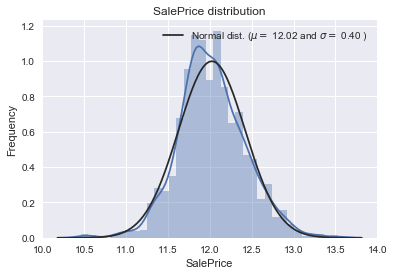

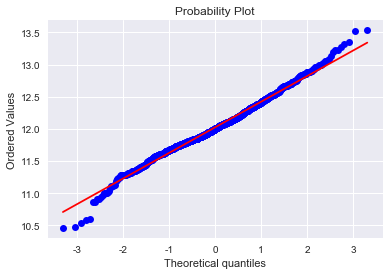

In [72]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
train_df["SalePrice"] = np.log1p(train_df["SalePrice"])

#Check the new distribution 
sns.distplot(train_df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train_df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train_df['SalePrice'], plot=plt)
plt.show()

In [73]:
combine_df = pd.concat([train_df,test_df])
Y_train = train_df.SalePrice.values
combine_df.drop(['SalePrice'], axis=1, inplace=True)

In [74]:
#missing data
total = combine_df.isnull().sum().sort_values(ascending=False)
percent = (combine_df.isnull().sum()/len(combine_df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(40)

,Total,Percent
PoolQC,2908,0.996915
MiscFeature,2812,0.964004
Alley,2719,0.932122
Fence,2346,0.804251
FireplaceQu,1420,0.486802
LotFrontage,486,0.166610
GarageQual,159,0.054508
GarageFinish,159,0.054508
GarageYrBlt,159,0.054508
GarageCond,159,0.054508


In [75]:
combine_df["PoolQC"] = combine_df["PoolQC"].fillna("None")
combine_df["MiscFeature"] = combine_df["MiscFeature"].fillna("None")
combine_df["Alley"] = combine_df["Alley"].fillna("None")
combine_df["Fence"] = combine_df["Fence"].fillna("None")
combine_df["FireplaceQu"] = combine_df["FireplaceQu"].fillna("None")

combine_df["LotFrontage"] = combine_df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))


for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    combine_df[col] = combine_df[col].fillna('None')
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    combine_df[col] = combine_df[col].fillna(0)

    

# Bsmt:对于所有这些类别的基底相关特征，NaN表示没有地下室。    
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    combine_df[col] = combine_df[col].fillna(0)
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    combine_df[col] = combine_df[col].fillna('None')
    

In [76]:
combine_df["MasVnrType"] = combine_df["MasVnrType"].fillna("None")
combine_df["MasVnrArea"] = combine_df["MasVnrArea"].fillna(0)
combine_df['MSZoning'] = combine_df['MSZoning'].fillna(combine_df['MSZoning'].mode()[0])

# Utilities：所有记录均为“AllPub”，除了一个“NoSeWa”和2个NA。 
# 由于拥有'NoSewa'的房子在训练集中，因此此特征对预测建模无助。 
# 可以删除它。
combine_df = combine_df.drop(['Utilities'], axis=1)

# 缺失值说明不具备特殊功能型
combine_df["Functional"] = combine_df["Functional"].fillna("Typ")

# Electrical: 有一个NA值。 由于这个功能主要是'SBrkr'，所以我们可以设置这个缺失值。
combine_df['Electrical'] = combine_df['Electrical'].fillna(combine_df['Electrical'].mode()[0])

# KitchenQual：只有一个NA值，与Electrical相同.
# 我们在KitchenQual中为缺失值设置'TA'（这是最常见的）。
combine_df['KitchenQual'] = combine_df['KitchenQual'].fillna(combine_df['KitchenQual'].mode()[0])


# Exterior1st和Exterior2nd：外观1和2都只有一个缺失值。 我们只会替换最常用的字符串
combine_df['Exterior1st'] = combine_df['Exterior1st'].fillna(combine_df['Exterior1st'].mode()[0])
combine_df['Exterior2nd'] = combine_df['Exterior2nd'].fillna(combine_df['Exterior2nd'].mode()[0])

# SaleType：再次填入最常见的是“WD”
combine_df['SaleType'] = combine_df['SaleType'].fillna(combine_df['SaleType'].mode()[0])

# MSSubClass：Na最有可能意味着没有建筑类。 我们可以用None替换缺失的值
combine_df['MSSubClass'] = combine_df['MSSubClass'].fillna("None")

In [77]:
#missing data
total = combine_df.isnull().sum().sort_values(ascending=False)
percent = (combine_df.isnull().sum()/len(combine_df)).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head()

,Total,Percent
YrSold,0,0.0
Foundation,0,0.0
ExterCond,0,0.0
ExterQual,0,0.0
Exterior1st,0,0.0


In [78]:
# Adding total sqfootage feature 
combine_df['TotalSF'] = combine_df['TotalBsmtSF'] + combine_df['1stFlrSF'] + combine_df['2ndFlrSF']

In [79]:
numeric_feats = combine_df.dtypes[combine_df.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = combine_df[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [80]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #combine_df[feat] += 1
    combine_df[feat] = boxcox1p(combine_df[feat], lam)
    
#combine_df[skewed_features] = np.log1p(combine_df[skewed_features])

There are 38 skewed numerical features to Box Cox transform


In [121]:
combine_df = pd.get_dummies(combine_df)
print(combine_df.shape)
print(train_df.shape[0])

(2917, 301)
1458


In [102]:
X_train = combine_df.iloc[:1458,:].drop(["Id"], axis=1)
X_test = combine_df.iloc[1458:,:].drop(["Id"], axis=1)

In [103]:
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
import xgboost as xgb
import lightgbm as lgb

In [104]:
#Validation function
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X_train.values)
    rmse= np.sqrt(-cross_val_score(model, X_train.values, Y_train, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [105]:
lasso = make_pipeline(RobustScaler(), Lasso(alpha =0.0005, random_state=1))

In [106]:
ENet = make_pipeline(RobustScaler(), ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3))

In [107]:
KRR = KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)

In [108]:
GBoost = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [109]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=3, 
                             min_child_weight=1.7817, n_estimators=2200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, silent=1,
                             random_state =7, nthread = -1)

In [110]:


model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.05, n_estimators=720,
                              max_bin = 55)

In [111]:
score = rmsle_cv(lasso)
print("\nLasso score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(ENet)
print("ElasticNet score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(KRR)
print("Kernel Ridge score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(GBoost)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_xgb)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

score = rmsle_cv(model_lgb)
print("LGBM score: {:.4f} ({:.4f})\n" .format(score.mean(), score.std()))


Lasso score: 0.1106 (0.0065)

ElasticNet score: 0.1107 (0.0066)

Kernel Ridge score: 0.1142 (0.0063)

Gradient Boosting score: 0.1173 (0.0083)

Xgboost score: 0.1158 (0.0063)

LGBM score: 0.1228 (0.0066)



Bagging

In [112]:
class AveragingModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([
            model.predict(X) for model in self.models_
        ])
        return np.mean(predictions, axis=1)  

In [113]:
averaged_models = AveragingModels(models = (ENet, GBoost, KRR, lasso))

score = rmsle_cv(averaged_models)
print(" Averaged base models score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

 Averaged base models score: 0.1086 (0.0066)



In [114]:
averaged_models.fit(X_train,Y_train)
Y_pred = np.expm1(averaged_models.predict(X_test))
result = pd.DataFrame({'Id':test_df['Id'].as_matrix(), 'SalePrice':Y_pred.astype(np.float32)})
result.to_csv("averaged_models_predictions.csv", index=False)

Stacking

In [41]:
class StackingAveragedModels(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, base_models, meta_model, n_folds=5):
        self.base_models = base_models
        self.meta_model = meta_model
        self.n_folds = n_folds
   
    # We again fit the data on clones of the original models
    def fit(self, X, y):
        self.base_models_ = [list() for x in self.base_models]
        self.meta_model_ = clone(self.meta_model)
        kfold = KFold(n_splits=self.n_folds, shuffle=True, random_state=156)
        
        # Train cloned base models then create out-of-fold predictions
        # that are needed to train the cloned meta-model
        out_of_fold_predictions = np.zeros((X.shape[0], len(self.base_models)))
        for i, model in enumerate(self.base_models):
            for train_index, holdout_index in kfold.split(X, y):
                instance = clone(model)
                self.base_models_[i].append(instance)
                instance.fit(X[train_index], y[train_index])
                y_pred = instance.predict(X[holdout_index])
                out_of_fold_predictions[holdout_index, i] = y_pred
                
        # Now train the cloned  meta-model using the out-of-fold predictions as new feature
        self.meta_model_.fit(out_of_fold_predictions, y)
        return self
   
    #Do the predictions of all base models on the test data and use the averaged predictions as 
    #meta-features for the final prediction which is done by the meta-model
    def predict(self, X):
        meta_features = np.column_stack([
            np.column_stack([model.predict(X) for model in base_models]).mean(axis=1)
            for base_models in self.base_models_ ])
        return self.meta_model_.predict(meta_features)

In [115]:
stacked_averaged_models = StackingAveragedModels(base_models = (ENet, GBoost, KRR),
                                                 meta_model = lasso)

score = rmsle_cv(stacked_averaged_models)
print("Stacking Averaged models score: {:.4f} ({:.4f})".format(score.mean(), score.std()))

Stacking Averaged models score: 0.1082 (0.0067)


In [116]:
stacked_averaged_models.fit(X_train.values,Y_train)
stacked_pred = np.expm1(stacked_averaged_models.predict(X_test))
Y_pred = stacked_pred
result = pd.DataFrame({'Id':test_df['Id'].as_matrix(), 'SalePrice':Y_pred.astype(np.float32)})
result.to_csv("stacked_averaged_models_predictions.csv", index=False)

Ensembling StackedRegressor, XGBoost and LightGBM

In [44]:
def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

In [117]:
stacked_train_pred = stacked_averaged_models.predict(X_train)
print(rmsle(Y_train,stacked_train_pred))

0.0800984955392


In [118]:
model_xgb.fit(X_train, Y_train)
xgb_train_pred = model_xgb.predict(X_train)
xgb_pred = np.expm1(model_xgb.predict(X_test))
print(rmsle(Y_train, xgb_train_pred))

0.078041011615


In [119]:
model_lgb.fit(X_train, Y_train)
lgb_train_pred = model_lgb.predict(X_train)
lgb_pred = np.expm1(model_lgb.predict(X_test))
print(rmsle(Y_train, lgb_train_pred))

0.0674762798895


In [120]:
Y_pred = 0.15*xgb_pred+0.15*lgb_pred + 0.7*stacked_pred
result = pd.DataFrame({'Id':test_df['Id'].as_matrix(), 'SalePrice':Y_pred.astype(np.float32)})
result.to_csv("ensemble_predictions.csv", index=False)

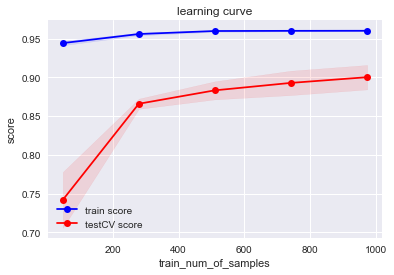

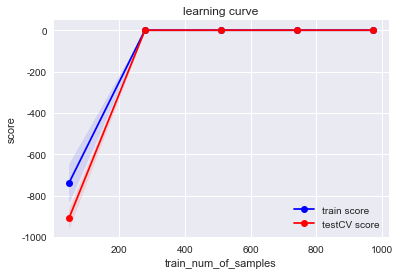

In [35]:
def plot_learning_curve(clf, title, X, y, ylim=None, cv=5, n_jobs=1, train_sizes=np.linspace(.05, 1., 5)):
    train_sizes, train_scores, test_scores = learning_curve(
        clf, X, y, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    ax = plt.figure().add_subplot(111)
    ax.set_title(title)
    if ylim is not None:
        ax.ylim(*ylim)
    ax.set_xlabel(u"train_num_of_samples")
    ax.set_ylabel(u"score")

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                     alpha=0.1, color="b")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                     alpha=0.1, color="r")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"train score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"testCV score")

    ax.legend(loc="best")

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

#clf = RandomForestClassifier(n_estimators=300, max_depth=8, criterion='entropy')
plot_learning_curve(model_xgb, u"learning curve",X_train, Y_train)
plot_learning_curve(model_lgb, u"learning curve",X_train, Y_train)
plt.show()